In [1]:
import requests 

# How was this converted to json
docs_url = 'https://github.com/alexeygrigorev/llm-rag-workshop/raw/main/notebooks/documents.json'
docs_response = requests.get(docs_url)
documents_raw = docs_response.json()

documents = []

for course in documents_raw:
    course_name = course['course']

    for doc in course['documents']:
        doc['course'] = course_name
        documents.append(doc)

In [91]:
import pandas as pd
# Set the maximum number of rows and columns to display
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
# Set the maximum column width to a large value
pd.set_option('display.max_colwidth', None)

In [92]:
df = pd.DataFrame(documents, columns=['course', 'section', 'question', 'text'])
df.head()


,course,section,question,text
0,data-engineering-zoomcamp,General course-related questions,Course - When will the course start?,The purpose of this document is to capture frequently asked technical questions\nThe exact day and hour of the course will be 15th Jan 2024 at 17h00. The course will start with the first “Office Hours'' live.1\nSubscribe to course public Google Calendar (it works from Desktop only).\nRegister before the course starts using this link.\nJoin the course Telegram channel with announcements.\nDon’t forget to register in DataTalks.Club's Slack and join the channel.
1,data-engineering-zoomcamp,General course-related questions,Course - What are the prerequisites for this course?,GitHub - DataTalksClub data-engineering-zoomcamp#prerequisites
2,data-engineering-zoomcamp,General course-related questions,Course - Can I still join the course after the start date?,"Yes, even if you don't register, you're still eligible to submit the homeworks.\nBe aware, however, that there will be deadlines for turning in the final projects. So don't leave everything for the last minute."
3,data-engineering-zoomcamp,General course-related questions,Course - I have registered for the Data Engineering Bootcamp. When can I expect to receive the confirmation email?,You don't need it. You're accepted. You can also just start learning and submitting homework without registering. It is not checked against any registered list. Registration is just to gauge interest before the start date.
4,data-engineering-zoomcamp,General course-related questions,Course - What can I do before the course starts?,You can start by installing and setting up all the dependencies and requirements:\nGoogle cloud account\nGoogle Cloud SDK\nPython 3 (installed with Anaconda)\nTerraform\nGit\nLook over the prerequisites and syllabus to see if you are comfortable with these subjects.


In [4]:
# df[df.course == 'data-engineering-zoomcamp'].head()
df = df[df.course == 'data-engineering-zoomcamp']
df.head()

,course,section,question,text
0,data-engineering-zoomcamp,General course-related questions,Course - When will the course start?,The purpose of this document is to capture fre...
1,data-engineering-zoomcamp,General course-related questions,Course - What are the prerequisites for this c...,GitHub - DataTalksClub data-engineering-zoomca...
2,data-engineering-zoomcamp,General course-related questions,Course - Can I still join the course after the...,"Yes, even if you don't register, you're still ..."
3,data-engineering-zoomcamp,General course-related questions,Course - I have registered for the Data Engine...,You don't need it. You're accepted. You can al...
4,data-engineering-zoomcamp,General course-related questions,Course - What can I do before the course starts?,You can start by installing and setting up all...


In [5]:
# docs_example = [
#     "January course details, register now",
#     "Course prerequisites listed in January catalog",
#     "Submit January course homework by end of month",
#     "Register for January course, no prerequisites",
#     "January course setup: Python and Google Cloud"
# ]

# Vector spaces
- turn the docs into vectors
- term-document matrix:
  - rows: documents
  - columns: words/tokens
- BAG of words
  - order of words doesn't matter
  - only the frequency of words
  - sparse matrices. Most of the value are Zeros

In [6]:
from sklearn.feature_extraction.text import CountVectorizer # This library is used to create a vector space

In [7]:
cv = CountVectorizer()

In [8]:
# cv.fit(docs_example) # Load just the example documents

In [9]:
cv.fit(df.text) # Fit with an the Text from the documents that rapresent the answers

CountVectorizer()

In [10]:
names = cv.get_feature_names_out()
names

array(['00', '00021', '009s', ..., '要了解键盘快捷键', '要启用屏幕阅读器支持', '请按ctrl'],
      dtype=object)

In [11]:
names.shape

(4074,)

We can see that we have too many words in the term-document matrix. We can reduce the number of words by:
- including only the words that appears at least in 5 documents

In [12]:
cv = CountVectorizer(min_df=5)
cv.fit(df.text) # Fit with an the Text from the documents that rapresent the answers
names = cv.get_feature_names_out()
names.shape
# Now we have fewer words

(883,)

In [13]:
names

array(['01', '04', '05', '10', '100', '11', '12', '13', '16', '17',
       '2019', '2024', '22', '24', '403', '5431', '5432', '7077', '80',
       '8080', 'able', 'about', 'above', 'access', 'account', 'across',
       'activate', 'add', 'added', 'adding', 'additional', 'address',
       'admin', 'after', 'again', 'airflow', 'alexey', 'all', 'allows',
       'already', 'also', 'alternative', 'alternatively', 'am', 'an',
       'anaconda', 'anaconda3', 'analytics', 'anand', 'and', 'another',
       'ans', 'answer', 'any', 'apache', 'api', 'app', 'appear',
       'appears', 'append', 'application', 'apply', 'appname', 'apt',
       'archives', 'are', 'argument', 'as', 'ask', 'assigned', 'at',
       'attempting', 'auth', 'authentication', 'automatically',
       'available', 'avoid', 'azure', 'back', 'bad', 'base', 'based',
       'bash', 'bashrc', 'be', 'because', 'been', 'before', 'being',
       'below', 'best', 'better', 'between', 'bigquery', 'bin', 'binary',
       'bit', 'blob', '

In [14]:
# X = cv.transform(docs_example)

In [15]:
X = cv.transform(df.text)
# df[df['course'] == 'data-engineering-zoomcamp']
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 17845 stored elements and shape (435, 883)>

In [16]:
X.toarray() # THis is showing also all the zero values but we are not interested in them. We are interested in the non-zero values therefore we will transform this into a dense matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
X.todense()
# In the list names we have all the words that are in the documents.
# In the matrix X we have the frequency of each word in every row of the matrix. A row is a answer in our original dataset

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0]])

In [18]:
df_docs = pd.DataFrame(X.toarray(), columns=names).T
df_docs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434
01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2
100,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
you,0,0,2,3,2,2,0,3,3,2,1,4,1,2,1,1,2,8,5,0,8,2,3,1,3,5,1,2,4,0,0,0,2,7,3,0,0,0,4,16,8,6,0,4,5,0,0,1,9,4,...,0,1,0,4,0,1,3,1,2,0,4,3,0,1,0,0,1,1,2,3,0,1,1,3,0,0,4,2,2,1,2,1,3,2,4,1,0,0,1,1,3,2,0,1,2,2,0,1,6,0
your,0,0,0,0,0,1,0,2,1,0,1,0,1,0,0,1,3,1,3,0,2,0,1,1,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,11,0,6,0,0,0,0,0,0,4,1,...,0,3,0,0,0,0,0,1,2,0,0,1,0,1,0,0,0,0,4,0,0,0,0,4,0,5,5,0,0,0,2,0,1,0,4,0,0,0,0,3,0,1,0,0,2,2,0,0,3,0
youtube,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
zip,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
pd.DataFrame(X.todense(), columns=cv.get_feature_names_out())

,01,04,05,10,100,11,12,13,16,17,2019,2024,22,24,403,5431,5432,7077,80,8080,able,about,above,access,account,across,activate,add,added,adding,additional,address,admin,after,again,airflow,alexey,all,allows,already,also,alternative,alternatively,am,an,anaconda,anaconda3,analytics,anand,and,...,vscode,want,was,way,we,web,website,week,wget,what,whatever,when,where,which,while,who,whole,why,will,window,windows,winpty,with,within,without,won,work,worked,worker,working,works,workshop,would,write,writing,wrong,wsl,wsl2,www,yaml,year,yellow,yellow_tripdata_2021,yes,yml,you,your,youtube,zip,zoomcamp
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,2,0,0,0
431,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,2,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
432,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
433,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,1,0,0,0,3,6,3,0,0,1


In [20]:
pd.DataFrame(X.todense(), columns=cv.get_feature_names_out()).T # Transpose the matrix to read it better. I.E: Document 12 containts 1 "you", 1 "your" and 2 "youtube"

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434
01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2
100,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
you,0,0,2,3,2,2,0,3,3,2,1,4,1,2,1,1,2,8,5,0,8,2,3,1,3,5,1,2,4,0,0,0,2,7,3,0,0,0,4,16,8,6,0,4,5,0,0,1,9,4,...,0,1,0,4,0,1,3,1,2,0,4,3,0,1,0,0,1,1,2,3,0,1,1,3,0,0,4,2,2,1,2,1,3,2,4,1,0,0,1,1,3,2,0,1,2,2,0,1,6,0
your,0,0,0,0,0,1,0,2,1,0,1,0,1,0,0,1,3,1,3,0,2,0,1,1,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,11,0,6,0,0,0,0,0,0,4,1,...,0,3,0,0,0,0,0,1,2,0,0,1,0,1,0,0,0,0,4,0,0,0,0,4,0,5,5,0,0,0,2,0,1,0,4,0,0,0,0,3,0,1,0,0,2,2,0,0,3,0
youtube,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
zip,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
df['text'].iloc[12] # Just as verification

'The zoom link is only published to instructors/presenters/TAs.\nStudents participate via Youtube Live and submit questions to Slido (link would be pinned in the chat when Alexey goes Live). The video URL should be posted in the announcements channel on Telegram & Slack before it begins. Also, you will see it live on the DataTalksClub YouTube Channel.\nDon’t post your questions in chat as it would be off-screen before the instructors/moderators have a chance to answer it if the room is very active.'

In [22]:
# cv = CountVectorizer(stop_words='english') # This will remove the stop words from the text like: in , no, of  etc that are not useful
# X = cv.fit_transform(docs_example)

# names = cv.get_feature_names_out()

# df_docs = pd.DataFrame(X.toarray(), columns=names).T
# df_docs

# THIS IS A BAG OF WORDS


In [23]:
cv = CountVectorizer(stop_words='english', min_df=5) # This will remove the stop words from the text like: in , no, of  etc that are not useful
X = cv.fit_transform(df.text)

names = cv.get_feature_names_out()

df_docs = pd.DataFrame(X.toarray(), columns=names).T
df_docs

# THIS IS A BAG OF WORDS

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434
01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2
100,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yes,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
yml,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
youtube,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
zip,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer # More imporrant words are the less frequent words.

In [25]:
# cv = TfidfVectorizer(stop_words='english')
# X = cv.fit_transform(docs_example)

# names = cv.get_feature_names_out()

# df_docs = pd.DataFrame(X.toarray(), columns=names).T
# # This is the term frequency inverse document frequency meaning that the words that are less frequent in the document will have a higher weight
# df_docs.round(2)

In [26]:
cv = TfidfVectorizer(stop_words='english', min_df=5)
X = cv.fit_transform(df.text)

names = cv.get_feature_names_out() # List of available words in all the documents

df_docs = pd.DataFrame(X.toarray(), columns=names).T
# This is the term frequency inverse document frequency meaning that the words that are less frequent in the document will have a higher weight
# Higher weight means that the word is more important because is less frequent in the document. Is this calculated for the whole dataset or for each document?
df_docs.round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434
01,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.08,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
04,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.29,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
05,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.22,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
10,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.09,0.03
100,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.22,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.17,0.0,0.0,0.0,0.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yes,0.0,0.00,0.34,0.0,0.0,0.00,0.25,0.31,0.18,0.00,0.0,0.0,0.00,0.34,0.0,0.0,0.27,0.0,0.00,0.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.18,0.0,0.0,0.0,0.5,0.14,0.0,0.39,0.00,0.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.18,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.14,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
yml,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.39,0.0,0.13,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.15,0.06,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.13,0.00
youtube,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.18,0.0,0.0,0.37,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00

In [27]:
df_docs.round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434
01,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.08,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
04,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.29,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
05,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.22,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
10,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.09,0.03
100,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.22,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.17,0.0,0.0,0.0,0.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yes,0.0,0.00,0.34,0.0,0.0,0.00,0.25,0.31,0.18,0.00,0.0,0.0,0.00,0.34,0.0,0.0,0.27,0.0,0.00,0.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.18,0.0,0.0,0.0,0.5,0.14,0.0,0.39,0.00,0.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.18,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.14,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
yml,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.39,0.0,0.13,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.15,0.06,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.13,0.00
youtube,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.18,0.0,0.0,0.37,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00

In [28]:
query = "Do I need to know python to sign up for the January course?"

In [29]:
q = cv.transform([query]) # Transforming the query to a vector space based on our training data.
q.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [30]:
X.dot(q.T) # This is the dot product of the matrix X and the query q. This will give us the similarity between the query and the documents in the dataset

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 128 stored elements and shape (435, 1)>

In [31]:
X.dot(q.T).todense() # This is the similarity between the query and the documents in the dataset in a dense matrix
# It gives a number between 0 and 1. The closer to 1 the more similar the document is to the query

matrix([[0.4389195 ],
        [0.        ],
        [0.        ],
        [0.10272051],
        [0.09061387],
        [0.        ],
        [0.        ],
        [0.37634321],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.34569631],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.16813692],
        [0.        ],
        [0.        ],
        [0.11305004],
        [0.14072055],
        [0.        ],
        [0.09828835],
        [0.35236451],
        [0.17154441],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.39401731],
        [0.24051751],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.13137124],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.01703551],
        [0.05064299],
        [0.11656627],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [32]:
print(q)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3 stored elements and shape (1, 726)>
  Coords	Values
  (0, 144)	0.672829040643062
  (0, 411)	0.5114205743908832
  (0, 504)	0.5345559635408026


In [33]:
query_dict = dict(zip(names, q.toarray()[0])) # Zip is important why it returns an iterator of tuples. This generation is on the fly and it is not stored in memory being useful for large datasets.
query_dict

{'01': np.float64(0.0),
 '04': np.float64(0.0),
 '05': np.float64(0.0),
 '10': np.float64(0.0),
 '100': np.float64(0.0),
 '11': np.float64(0.0),
 '12': np.float64(0.0),
 '13': np.float64(0.0),
 '16': np.float64(0.0),
 '17': np.float64(0.0),
 '2019': np.float64(0.0),
 '2024': np.float64(0.0),
 '22': np.float64(0.0),
 '24': np.float64(0.0),
 '403': np.float64(0.0),
 '5431': np.float64(0.0),
 '5432': np.float64(0.0),
 '7077': np.float64(0.0),
 '80': np.float64(0.0),
 '8080': np.float64(0.0),
 'able': np.float64(0.0),
 'access': np.float64(0.0),
 'account': np.float64(0.0),
 'activate': np.float64(0.0),
 'add': np.float64(0.0),
 'added': np.float64(0.0),
 'adding': np.float64(0.0),
 'additional': np.float64(0.0),
 'address': np.float64(0.0),
 'admin': np.float64(0.0),
 'airflow': np.float64(0.0),
 'alexey': np.float64(0.0),
 'allows': np.float64(0.0),
 'alternative': np.float64(0.0),
 'alternatively': np.float64(0.0),
 'anaconda': np.float64(0.0),
 'anaconda3': np.float64(0.0),
 'analytics

In [34]:
X.toarray()[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [35]:
names

array(['01', '04', '05', '10', '100', '11', '12', '13', '16', '17',
       '2019', '2024', '22', '24', '403', '5431', '5432', '7077', '80',
       '8080', 'able', 'access', 'account', 'activate', 'add', 'added',
       'adding', 'additional', 'address', 'admin', 'airflow', 'alexey',
       'allows', 'alternative', 'alternatively', 'anaconda', 'anaconda3',
       'analytics', 'anand', 'ans', 'answer', 'apache', 'api', 'app',
       'appear', 'appears', 'append', 'application', 'apply', 'appname',
       'apt', 'archives', 'argument', 'ask', 'assigned', 'attempting',
       'auth', 'authentication', 'automatically', 'available', 'avoid',
       'azure', 'bad', 'base', 'based', 'bash', 'bashrc', 'best',
       'better', 'bigquery', 'bin', 'binary', 'bit', 'blob', 'block',
       'bq', 'branch', 'browser', 'bucket', 'build', 'builder', 'built',
       'called', 'capstone', 'case', 'cast', 'cause', 'cd', 'certificate',
       'change', 'changed', 'changes', 'changing', 'channel', 'check',
 

In [36]:
# Match against the documents [1]
doc_dict = dict(zip(names, X.toarray()[1]))
doc_dict

{'01': np.float64(0.0),
 '04': np.float64(0.0),
 '05': np.float64(0.0),
 '10': np.float64(0.0),
 '100': np.float64(0.0),
 '11': np.float64(0.0),
 '12': np.float64(0.0),
 '13': np.float64(0.0),
 '16': np.float64(0.0),
 '17': np.float64(0.0),
 '2019': np.float64(0.0),
 '2024': np.float64(0.0),
 '22': np.float64(0.0),
 '24': np.float64(0.0),
 '403': np.float64(0.0),
 '5431': np.float64(0.0),
 '5432': np.float64(0.0),
 '7077': np.float64(0.0),
 '80': np.float64(0.0),
 '8080': np.float64(0.0),
 'able': np.float64(0.0),
 'access': np.float64(0.0),
 'account': np.float64(0.0),
 'activate': np.float64(0.0),
 'add': np.float64(0.0),
 'added': np.float64(0.0),
 'adding': np.float64(0.0),
 'additional': np.float64(0.0),
 'address': np.float64(0.0),
 'admin': np.float64(0.0),
 'airflow': np.float64(0.0),
 'alexey': np.float64(0.0),
 'allows': np.float64(0.0),
 'alternative': np.float64(0.0),
 'alternatively': np.float64(0.0),
 'anaconda': np.float64(0.0),
 'anaconda3': np.float64(0.0),
 'analytics

# Create a rank with the most important words
Our query is now a vector space that show the importance of each word based on the training data. We can now create a rank of the most important words in the training data find the more relevant document for the given query.

In [37]:
df_qd = pd.DataFrame([query_dict, doc_dict], index=['query', 'doc']).T

In [38]:
df_qd['query'] * df_qd['doc']

01          0.0
04          0.0
05          0.0
10          0.0
100         0.0
           ... 
yes         0.0
yml         0.0
youtube     0.0
zip         0.0
zoomcamp    0.0
Length: 726, dtype: float64

In [39]:
(df_qd['query'] * df_qd['doc']).sum() # WHat does this mean?

np.float64(0.0)

In [40]:
X.dot(q.T).toarray() # This is the dot product of the query and the document. CALLED DOT PRODUCT in linear algebra

array([[0.4389195 ],
       [0.        ],
       [0.        ],
       [0.10272051],
       [0.09061387],
       [0.        ],
       [0.        ],
       [0.37634321],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.34569631],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.16813692],
       [0.        ],
       [0.        ],
       [0.11305004],
       [0.14072055],
       [0.        ],
       [0.09828835],
       [0.35236451],
       [0.17154441],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.39401731],
       [0.24051751],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.13137124],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.01703551],
       [0.05064299],
       [0.11656627],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.048

In [41]:
X.dot(q.T).todense() # This is the equivalent of the cosine similarity. See Below.

matrix([[0.4389195 ],
        [0.        ],
        [0.        ],
        [0.10272051],
        [0.09061387],
        [0.        ],
        [0.        ],
        [0.37634321],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.34569631],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.16813692],
        [0.        ],
        [0.        ],
        [0.11305004],
        [0.14072055],
        [0.        ],
        [0.09828835],
        [0.35236451],
        [0.17154441],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.39401731],
        [0.24051751],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.13137124],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.01703551],
        [0.05064299],
        [0.11656627],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [42]:
X.dot(q.T).toarray().sum()

np.float64(13.40802668730218)

In [43]:
from sklearn.metrics.pairwise import cosine_similarity

In [44]:
cosine_similarity(X, q)

array([[0.4389195 ],
       [0.        ],
       [0.        ],
       [0.10272051],
       [0.09061387],
       [0.        ],
       [0.        ],
       [0.37634321],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.34569631],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.16813692],
       [0.        ],
       [0.        ],
       [0.11305004],
       [0.14072055],
       [0.        ],
       [0.09828835],
       [0.35236451],
       [0.17154441],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.39401731],
       [0.24051751],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.13137124],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.01703551],
       [0.05064299],
       [0.11656627],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.048

In [45]:
score = cosine_similarity(X, q).flatten()
score

array([0.4389195 , 0.        , 0.        , 0.10272051, 0.09061387,
       0.        , 0.        , 0.37634321, 0.        , 0.        ,
       0.        , 0.34569631, 0.        , 0.        , 0.        ,
       0.16813692, 0.        , 0.        , 0.11305004, 0.14072055,
       0.        , 0.09828835, 0.35236451, 0.17154441, 0.        ,
       0.        , 0.        , 0.39401731, 0.24051751, 0.        ,
       0.        , 0.        , 0.        , 0.13137124, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01703551,
       0.05064299, 0.11656627, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.04830938, 0.09238338, 0.10381693,
       0.10258917, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.08098817, 0.        , 0.        , 0.        , 0.01589872,
       0.        , 0.        , 0.03628296, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [46]:
import numpy as np

np.argsort(score) # This is list of the sorted based on their importance. To the last 5 elements are the most probable answers to the query

array([385, 386, 387, 389, 390, 392,  12,  13,  56,  57,  58,  59,  61,
        62,  63, 384,  44,  45,  46,  51,  52,  53,  54,  55, 290, 291,
       294, 295, 296, 297, 298,  43,  66,  68,  69,  70,  71,  72,  73,
        74, 405, 407, 417, 409, 410, 412, 414,  65, 430, 429,  42, 397,
       399, 400, 402, 404,  14, 408,  34,  35,  36,  37,  38, 432, 128,
       129, 130, 131, 132, 133, 134, 135, 113, 114, 115, 117, 119, 120,
       121, 124,  98,  99, 104, 107, 108, 109, 110, 111,  87,  88,  89,
        92,  93,  94,  95,  97, 360, 361, 362, 139, 140, 141, 142, 143,
       351, 352, 354, 355, 356, 357, 358, 359, 339, 340, 341, 344, 346,
       347, 348, 349, 136, 138, 331, 334, 335, 336, 337, 338, 176, 177,
       178, 179, 182, 183, 185, 187, 166, 167, 168, 169, 170, 171, 173,
       175, 155, 156, 157, 160, 161, 162, 163, 164, 144, 145, 146, 147,
       149, 151, 152, 153, 203, 204, 205, 206, 207, 208, 209, 210, 314,
       315, 316, 317, 326, 328, 329, 330, 202, 300, 305, 307, 30

In [47]:
np.argsort(score)[-5:] # Here we have the documents with the most matching words to the query. It doesn't mean that the answer is correct but it is the most probable. In our case the correct answer in the number 7

array([ 22, 398,   7,  27,   0])

In [48]:
df.iloc[7].text

'Yes, we will keep all the materials after the course finishes, so you can follow the course at your own pace after it finishes.\nYou can also continue looking at the homeworks and continue preparing for the next cohort. I guess you can also start working on your final capstone project.'

In [49]:
fields = ['section', 'question', 'text']
matrices = {} # X
vectorizers = {} # cv
for f in fields:
    cv = TfidfVectorizer(stop_words='english', min_df=5)
    X = cv.fit_transform(df[f])
    matrices[f] = X
    vectorizers[f] = cv

In [50]:
matrices

{'section': <Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 1561 stored elements and shape (435, 36)>,
 'question': <Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 1613 stored elements and shape (435, 135)>,
 'text': <Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 10493 stored elements and shape (435, 726)>}

In [51]:
vectorizers

{'section': TfidfVectorizer(min_df=5, stop_words='english'),
 'question': TfidfVectorizer(min_df=5, stop_words='english'),
 'text': TfidfVectorizer(min_df=5, stop_words='english')}

In [52]:
query

'Do I need to know python to sign up for the January course?'

In [53]:
n = len(df)
score = np.zeros(n)
query = 'I just singned up. Is it too late to join the course?'
# Now in our datasets we have 3 fields: section, question and text. We will search in all of them
# But we can boost the score of the question field because it is more imporant for the matching

boosts = {
    # 'section': 0.5,
    'question': 3, 
    'text': 0.5
}
for f in fields:
    q = vectorizers[f].transform([query])
    X = matrices[f]
    f_score = cosine_similarity(X, q).flatten()
    boost = boosts.get(f, 1.0)
    score += f_score * boost

In [54]:
score

array([3.3232046 , 3.49747389, 3.08083871, 2.9766751 , 3.49747389,
       3.49747389, 2.43628975, 3.70528593, 2.72258503, 3.49747389,
       3.49747389, 2.49351213, 0.49747389, 0.49747389, 0.49747389,
       0.590317  , 0.49747389, 2.64463111, 0.55989871, 0.49747389,
       0.49747389, 0.49747389, 0.77095961, 0.59219857, 0.49747389,
       0.49747389, 0.49747389, 0.71504535, 0.60906738, 0.49747389,
       0.49747389, 0.49747389, 0.49747389, 1.71640633, 3.49747389,
       1.99612322, 0.49747389, 0.49747389, 0.49747389, 0.52388778,
       0.53673536, 1.98015558, 0.49747389, 0.53346444, 0.        ,
       0.        , 0.        , 0.        , 0.02281813, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05655868, 0.        , 0.00877908,
       0.        , 0.        , 0.        , 0.        , 0.05673575,
       0.        , 0.        , 0.        , 0.        , 0.     

In [55]:
# This is needs to filter only for our course. Our df is already filtered for our course so we will have all 1s in the mask 
filters = {
    'course': 'data-engineering-zoomcamp'
}
for field, value in filters.items():
    mask = (df[field] == value).astype(int)
    score *= mask
mask

0      1
1      1
2      1
3      1
4      1
      ..
430    1
431    1
432    1
433    1
434    1
Name: course, Length: 435, dtype: int64

In [56]:

idx = np.argsort(score)[-5:]
df.iloc[idx]

,course,section,question,text
5,data-engineering-zoomcamp,General course-related questions,Course - how many Zoomcamps in a year?,"There are 3 Zoom Camps in a year, as of 2024. ..."
4,data-engineering-zoomcamp,General course-related questions,Course - What can I do before the course starts?,You can start by installing and setting up all...
34,data-engineering-zoomcamp,General course-related questions,How can we contribute to the course?,Star the repo! Share it with friends if you fi...
1,data-engineering-zoomcamp,General course-related questions,Course - What are the prerequisites for this c...,GitHub - DataTalksClub data-engineering-zoomca...
7,data-engineering-zoomcamp,General course-related questions,Course - Can I follow the course after it fini...,"Yes, we will keep all the materials after the ..."


In [57]:
df.columns

Index(['course', 'section', 'question', 'text'], dtype='object')

In [58]:
fields = ['section', 'question', 'text']
transformers = {}
matrices = {}

for field in fields:
    cv = TfidfVectorizer(stop_words='english', min_df=5)
    X = cv.fit_transform(df[field])

    transformers[field] = cv
    matrices[field] = X

In [59]:
transformers['text'].get_feature_names_out()

array(['01', '04', '05', '10', '100', '11', '12', '13', '16', '17',
       '2019', '2024', '22', '24', '403', '5431', '5432', '7077', '80',
       '8080', 'able', 'access', 'account', 'activate', 'add', 'added',
       'adding', 'additional', 'address', 'admin', 'airflow', 'alexey',
       'allows', 'alternative', 'alternatively', 'anaconda', 'anaconda3',
       'analytics', 'anand', 'ans', 'answer', 'apache', 'api', 'app',
       'appear', 'appears', 'append', 'application', 'apply', 'appname',
       'apt', 'archives', 'argument', 'ask', 'assigned', 'attempting',
       'auth', 'authentication', 'automatically', 'available', 'avoid',
       'azure', 'bad', 'base', 'based', 'bash', 'bashrc', 'best',
       'better', 'bigquery', 'bin', 'binary', 'bit', 'blob', 'block',
       'bq', 'branch', 'browser', 'bucket', 'build', 'builder', 'built',
       'called', 'capstone', 'case', 'cast', 'cause', 'cd', 'certificate',
       'change', 'changed', 'changes', 'changing', 'channel', 'check',
 

In [60]:
matrices['text']

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10493 stored elements and shape (435, 726)>

In [61]:
query = "I just singned up. Is it too late to join the course?"

In [62]:
q = transformers['text'].transform([query])
score = cosine_similarity(matrices['text'], q).flatten()

In [63]:
mask = (df.course == 'data-engineering-zoomcamp').values
score = score * mask
score[:10]

array([0.48473178, 0.        , 0.        , 0.31854037, 0.        ,
       0.        , 0.        , 0.41562408, 0.        , 0.        ])

In [64]:
import numpy as np

# Set NumPy print options for better readability
np.set_printoptions(threshold=np.inf, edgeitems=3, linewidth=200, suppress=True)

<Token var=<ContextVar name='format_options' default={'edgeitems': 3, 'threshold': 1000, 'floatmode': 'maxprec', 'precision': 8, 'suppress': False, 'linewidth': 75, 'nanstr': 'nan', 'infstr': 'inf', 'sign': '-', 'formatter': None, 'legacy': 9223372036854775807, 'override_repr': None} at 0x7f4994cad580> at 0x7f49282616c0>

In [65]:
idx = np.argsort(-score)[:10]
idx

array([ 22,   0,  27,   7,   3,  11, 395,  28, 411, 148])

In [66]:
score[idx]

array([0.54697146, 0.48473178, 0.43514292, 0.41562408, 0.31854037, 0.29620951, 0.28580355, 0.22318698, 0.21202195, 0.20653448])

In [67]:
df.iloc[idx].text

22     It's up to you which platform and environment ...
0      The purpose of this document is to capture fre...
27     You can do most of the course without a cloud....
7      Yes, we will keep all the materials after the ...
3      You don't need it. You're accepted. You can al...
11     No, you can only get a certificate if you fini...
395    Each submitted project will be evaluated by 3 ...
28     Yes, you can. Just remember to adapt all the i...
411    The display name listed on the leaderboard is ...
148    One service account is enough for all the serv...
Name: text, dtype: object

In [68]:
fields

['section', 'question', 'text']

In [69]:
query = "I just singned up. Is it too late to join the course?"

In [70]:
boost = {'question': 3.0}

score = np.zeros(len(df))

for f in fields:
    b = boost.get(f, 1.0)
    q = transformers[f].transform([query])
    s = cosine_similarity(matrices[f], q).flatten()
    score = score + b * s

In [71]:
filters = {
    'course': 'data-engineering-zoomcamp'
}

for field, value in filters.items():
    mask = (df[field] == value).values
    score = score * mask

In [72]:
idx = np.argsort(-score)[:10]
results = df.iloc[idx]
results.to_dict(orient='records')

[{'course': 'data-engineering-zoomcamp',
  'section': 'General course-related questions',
  'question': 'Course - Can I follow the course after it finishes?',
  'text': 'Yes, we will keep all the materials after the course finishes, so you can follow the course at your own pace after it finishes.\nYou can also continue looking at the homeworks and continue preparing for the next cohort. I guess you can also start working on your final capstone project.'},
 {'course': 'data-engineering-zoomcamp',
  'section': 'General course-related questions',
  'question': 'Course - When will the course start?',
  'text': "The purpose of this document is to capture frequently asked technical questions\nThe exact day and hour of the course will be 15th Jan 2024 at 17h00. The course will start with the first  “Office Hours'' live.1\nSubscribe to course public Google Calendar (it works from Desktop only).\nRegister before the course starts using this link.\nJoin the course Telegram channel with announcem

In [73]:
class TextSearch:

    def __init__(self, text_fields):
        self.text_fields = text_fields
        self.matrices = {}
        self.vectorizers = {}

    def fit(self, records, vectorizer_params={}):
        self.df = pd.DataFrame(records)

        for f in self.text_fields:
            cv = TfidfVectorizer(**vectorizer_params)
            X = cv.fit_transform(self.df[f])
            self.matrices[f] = X
            self.vectorizers[f] = cv

    def search(self, query, n_results=10, boost={}, filters={}):
        score = np.zeros(len(self.df))

        for f in self.text_fields:
            b = boost.get(f, 1.0)
            q = self.vectorizers[f].transform([query])
            s = cosine_similarity(self.matrices[f], q).flatten()
            score = score + b * s

        for field, value in filters.items():
            mask = (self.df[field] == value).values
            score = score * mask

        idx = np.argsort(-score)[:n_results]
        results = self.df.iloc[idx]
        return results.to_dict(orient='records')

In [74]:
fields

['section', 'question', 'text']

In [75]:
index = TextSearch(text_fields=['section', 'question', 'text'])

In [76]:
index.fit(documents)

In [77]:
query

'I just singned up. Is it too late to join the course?'

In [78]:
index.search(
    query='I just singned up. Is it too late to join the course?',
    n_results=5,
    boost={'question': 3.0},
    filters={'course': 'data-engineering-zoomcamp'}
)

[{'text': "Yes, even if you don't register, you're still eligible to submit the homeworks.\nBe aware, however, that there will be deadlines for turning in the final projects. So don't leave everything for the last minute.",
  'section': 'General course-related questions',
  'question': 'Course - Can I still join the course after the start date?',
  'course': 'data-engineering-zoomcamp'},
 {'text': "The purpose of this document is to capture frequently asked technical questions\nThe exact day and hour of the course will be 15th Jan 2024 at 17h00. The course will start with the first  “Office Hours'' live.1\nSubscribe to course public Google Calendar (it works from Desktop only).\nRegister before the course starts using this link.\nJoin the course Telegram channel with announcements.\nDon’t forget to register in DataTalks.Club's Slack and join the channel.",
  'section': 'General course-related questions',
  'question': 'Course - When will the course start?',
  'course': 'data-engineerin

In [79]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10493 stored elements and shape (435, 726)>

# Apply SVD
SVD is decresing the dimensionality of the matrix.

![alt text](image-2.png)

SO the quality decrease. Why do we apply it? Because it is faster to compute the cosine similarity.
It tries to catch the most information in the matrix. It is trying to capture the semantic in the text creating a dense matrix.

In [80]:
from sklearn.decomposition import TruncatedSVD

In [81]:
X = matrices['text']
cv = transformers['text']

In [82]:
svd = TruncatedSVD(n_components=16)
X_emb = svd.fit_transform(X) # We redeuce the number of dimensions to 16

In [83]:
X_emb[0]

array([ 0.09623626, -0.0533194 , -0.02521884, -0.01510558, -0.05492287, -0.06028082, -0.1757751 , -0.07968206, -0.06835031,  0.27133937, -0.20887215,  0.04752999,  0.05368771, -0.05495741,
       -0.13056631,  0.03767208])

In [84]:
query = 'I just singned up. Is it too late to join the course?'

Q = cv.transform([query])
Q_emb = svd.transform(Q)

In [85]:
Q_emb[0]

array([ 0.06796443, -0.02119888, -0.0469435 , -0.03218304, -0.03680268, -0.02311393, -0.09745943, -0.09258954, -0.06044194,  0.25362632, -0.16695432,  0.0537529 ,  0.10367954, -0.02762806,
       -0.03654818,  0.04516254])

In [86]:
np.dot(X_emb[0], Q_emb[0]) # Here we compute the similarity between the query and the document

np.float64(0.161199284864107)

In [87]:
score = cosine_similarity(X_emb, Q_emb).flatten() # Flatten it turn it to 1-dim array

In [88]:
idx = np.argsort(-score)[:10]

In [89]:
list(df.loc[idx].text)

["The purpose of this document is to capture frequently asked technical questions\nThe exact day and hour of the course will be 15th Jan 2024 at 17h00. The course will start with the first  “Office Hours'' live.1\nSubscribe to course public Google Calendar (it works from Desktop only).\nRegister before the course starts using this link.\nJoin the course Telegram channel with announcements.\nDon’t forget to register in DataTalks.Club's Slack and join the channel.",
 'Yes, we will keep all the materials after the course finishes, so you can follow the course at your own pace after it finishes.\nYou can also continue looking at the homeworks and continue preparing for the next cohort. I guess you can also start working on your final capstone project.',
 'You can do most of the course without a cloud. Almost everything we use (excluding BigQuery) can be run locally. We won’t be able to provide guidelines for some things, but most of the materials are runnable without GCP.\nFor everything i

In [93]:
df.loc[idx]

,course,section,question,text
0,data-engineering-zoomcamp,General course-related questions,Course - When will the course start?,The purpose of this document is to capture frequently asked technical questions\nThe exact day and hour of the course will be 15th Jan 2024 at 17h00. The course will start with the first “Office Hours'' live.1\nSubscribe to course public Google Calendar (it works from Desktop only).\nRegister before the course starts using this link.\nJoin the course Telegram channel with announcements.\nDon’t forget to register in DataTalks.Club's Slack and join the channel.
7,data-engineering-zoomcamp,General course-related questions,Course - Can I follow the course after it finishes?,"Yes, we will keep all the materials after the course finishes, so you can follow the course at your own pace after it finishes.\nYou can also continue looking at the homeworks and continue preparing for the next cohort. I guess you can also start working on your final capstone project."
27,data-engineering-zoomcamp,General course-related questions,Environment - The GCP and other cloud providers are unavailable in some countries. Is it possible to provide a guide to installing a home lab?,"You can do most of the course without a cloud. Almost everything we use (excluding BigQuery) can be run locally. We won’t be able to provide guidelines for some things, but most of the materials are runnable without GCP.\nFor everything in the course, there’s a local alternative. You could even do the whole course locally."
28,data-engineering-zoomcamp,General course-related questions,Environment - I want to use AWS. May I do that?,"Yes, you can. Just remember to adapt all the information on the videos to AWS. Besides, the final capstone will be evaluated based on the task: Create a data pipeline! Develop a visualisation!\nThe problem would be when you need help. You’d need to rely on fellow coursemates who also use AWS (or have experience using it before), which might be in smaller numbers than those learning the course with GCP.\nAlso see Is it possible to use x tool instead of the one tool you use?"
11,data-engineering-zoomcamp,General course-related questions,Certificate - Can I follow the course in a self-paced mode and get a certificate?,"No, you can only get a certificate if you finish the course with a “live” cohort. We don't award certificates for the self-paced mode. The reason is you need to peer-review capstone(s) after submitting a project. You can only peer-review projects at the time the course is running."
32,data-engineering-zoomcamp,General course-related questions,Can I use Airflow instead for my final project?,"Yes, you can use any tool you want for your project."
13,data-engineering-zoomcamp,General course-related questions,"Office Hours - I can’t attend the “Office hours” / workshop, will it be recorded?",Yes! Every “Office Hours” will be recorded and available a few minutes after the live session is over; so you can view (or rewatch) whenever you want.
33,data-engineering-zoomcamp,General course-related questions,Is it possible to use tool “X” instead of the one tool you use in the course?,"Yes, this applies if you want to use Airflow or Prefect instead of Mage, AWS or Snowflake instead of GCP products or Tableau instead of Metabase or Google data studio.\nThe course covers 2 alternative data stacks, one using GCP and one using local installation of everything. You can use one of them or use your tool of choice.\nShould you consider it instead of the one tool you use? That we can’t support you if you choose to use a different stack, also you would need to explain the different choices of tool for the peer review of your capstone project."
2,data-engineering-zoomcamp,General course-related questions,Course - Can I still join the course after the start date?,"Yes, even if you don't register, you're still eligible to submit the homeworks.\nBe aware, however, that there will be deadlines for turning in the final projects. So don't 

Looking into the SVD matrix 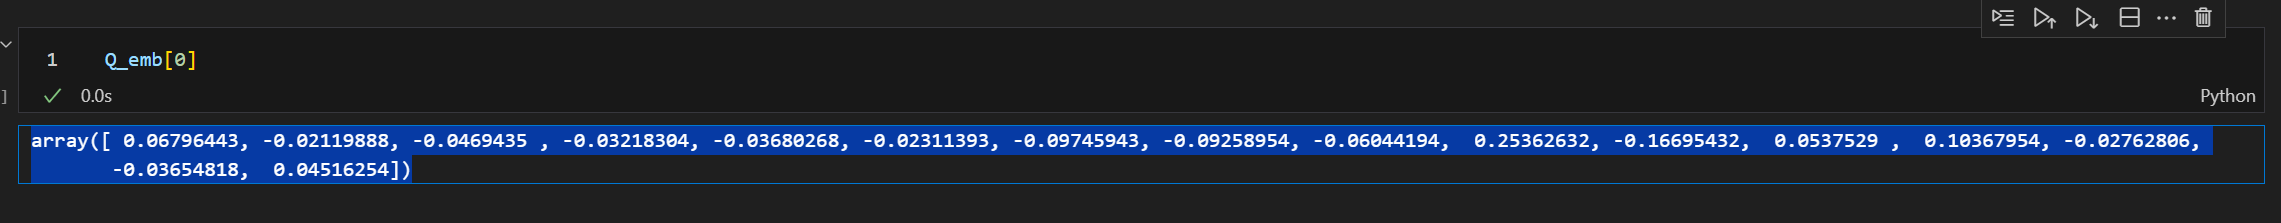 
We see negative values that can be difficult to interpret. We can use the NMf (Non-negative matrix factorization) that will give us only positive values.

In [93]:
from sklearn.decomposition import NMF

In [103]:
nmf = NMF(n_components=16)
X_emb = nmf.fit_transform(X)
X_emb[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.30663126,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [104]:
Q = cv.transform([query])
Q_emb = nmf.transform(Q)
Q_emb[0]

array([0.        , 0.00114538, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.1713533 ,
       0.        , 0.        , 0.        , 0.        , 0.00066279,
       0.        ])

Above we can see that we have some similarity between the query and the document. The higher the number the more similar the document is to the query.

In [97]:
score = cosine_similarity(X_emb, Q_emb).flatten()
idx = np.argsort(-score)[:10]
list(df.loc[idx].text)

["The purpose of this document is to capture frequently asked technical questions\nThe exact day and hour of the course will be 15th Jan 2024 at 17h00. The course will start with the first  “Office Hours'' live.1\nSubscribe to course public Google Calendar (it works from Desktop only).\nRegister before the course starts using this link.\nJoin the course Telegram channel with announcements.\nDon’t forget to register in DataTalks.Club's Slack and join the channel.",
 'Yes, we will keep all the materials after the course finishes, so you can follow the course at your own pace after it finishes.\nYou can also continue looking at the homeworks and continue preparing for the next cohort. I guess you can also start working on your final capstone project.',
 'You can do most of the course without a cloud. Almost everything we use (excluding BigQuery) can be run locally. We won’t be able to provide guidelines for some things, but most of the materials are runnable without GCP.\nFor everything i

In [98]:
df.loc[idx]

,course,section,question,text
0,data-engineering-zoomcamp,General course-related questions,Course - When will the course start?,The purpose of this document is to capture frequently asked technical questions\nThe exact day and hour of the course will be 15th Jan 2024 at 17h00. The course will start with the first “Office Hours'' live.1\nSubscribe to course public Google Calendar (it works from Desktop only).\nRegister before the course starts using this link.\nJoin the course Telegram channel with announcements.\nDon’t forget to register in DataTalks.Club's Slack and join the channel.
7,data-engineering-zoomcamp,General course-related questions,Course - Can I follow the course after it finishes?,"Yes, we will keep all the materials after the course finishes, so you can follow the course at your own pace after it finishes.\nYou can also continue looking at the homeworks and continue preparing for the next cohort. I guess you can also start working on your final capstone project."
27,data-engineering-zoomcamp,General course-related questions,Environment - The GCP and other cloud providers are unavailable in some countries. Is it possible to provide a guide to installing a home lab?,"You can do most of the course without a cloud. Almost everything we use (excluding BigQuery) can be run locally. We won’t be able to provide guidelines for some things, but most of the materials are runnable without GCP.\nFor everything in the course, there’s a local alternative. You could even do the whole course locally."
28,data-engineering-zoomcamp,General course-related questions,Environment - I want to use AWS. May I do that?,"Yes, you can. Just remember to adapt all the information on the videos to AWS. Besides, the final capstone will be evaluated based on the task: Create a data pipeline! Develop a visualisation!\nThe problem would be when you need help. You’d need to rely on fellow coursemates who also use AWS (or have experience using it before), which might be in smaller numbers than those learning the course with GCP.\nAlso see Is it possible to use x tool instead of the one tool you use?"
11,data-engineering-zoomcamp,General course-related questions,Certificate - Can I follow the course in a self-paced mode and get a certificate?,"No, you can only get a certificate if you finish the course with a “live” cohort. We don't award certificates for the self-paced mode. The reason is you need to peer-review capstone(s) after submitting a project. You can only peer-review projects at the time the course is running."
32,data-engineering-zoomcamp,General course-related questions,Can I use Airflow instead for my final project?,"Yes, you can use any tool you want for your project."
13,data-engineering-zoomcamp,General course-related questions,"Office Hours - I can’t attend the “Office hours” / workshop, will it be recorded?",Yes! Every “Office Hours” will be recorded and available a few minutes after the live session is over; so you can view (or rewatch) whenever you want.
33,data-engineering-zoomcamp,General course-related questions,Is it possible to use tool “X” instead of the one tool you use in the course?,"Yes, this applies if you want to use Airflow or Prefect instead of Mage, AWS or Snowflake instead of GCP products or Tableau instead of Metabase or Google data studio.\nThe course covers 2 alternative data stacks, one using GCP and one using local installation of everything. You can use one of them or use your tool of choice.\nShould you consider it instead of the one tool you use? That we can’t support you if you choose to use a different stack, also you would need to explain the different choices of tool for the peer review of your capstone project."
2,data-engineering-zoomcamp,General course-related questions,Course - Can I still join the course after the start date?,"Yes, even if you don't register, you're still eligible to submit the homeworks.\nBe aware, however, that there will be deadlines for turning in the final projects. So don't 

SVD is an old system and it uses Bag Of Words loosing the word order. This can be problematic in some cases.

**Here we created the embeddings of the words.**

Very good book: Introduction to Information Retrieval by Christopher D. Manning, Prabhakar Raghavan, and Hinrich Schütze

https://nlp.stanford.edu/IR-book/information-retrieval-book.html

# Embedding with Bert
- it captures BoW
- it captures the word order

pipenv install torch transformers tqdm

In [101]:
import torch
from transformers import BertModel, BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased") # Turns text in some rappresantion that the model can understand 
model = BertModel.from_pretrained("bert-base-uncased")
model.eval()  # Set the model to evaluation mode if not training

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [70]:
texts = [
    "Yes, we will keep all the materials after the course finishes.",
    "You can follow the course at your own pace after it finishes"
]
encoded_input = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')


In [71]:
encoded_input

{'input_ids': tensor([[  101,  2748,  1010,  2057,  2097,  2562,  2035,  1996,  4475,  2044,
          1996,  2607, 12321,  1012,   102],
        [  101,  2017,  2064,  3582,  1996,  2607,  2012,  2115,  2219,  6393,
          2044,  2009, 12321,   102,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]])}

In [72]:
with torch.no_grad():  # Disable gradient calculation for inference
    outputs = model(**encoded_input)
    hidden_states = outputs.last_hidden_state

In [73]:
hidden_states.shape

torch.Size([2, 15, 768])

In [75]:
sentence_embeddings = hidden_states.mean(dim=1)
sentence_embeddings.shape

torch.Size([2, 768])

In [78]:
sentence_embeddings.numpy()

# note that if use a GPU, first you need to move your tensors to CPU
# sentence_embeddings_cpu = sentence_embeddings.cpu()

array([[ 0.35999233, -0.16072303,  0.35452363, ...,  0.04289245,
         0.03482292, -0.03822247],
       [ 0.17849916, -0.500025  ,  0.25277564, ..., -0.11413109,
        -0.3360847 ,  0.4109514 ]], dtype=float32)

In [80]:
def make_batches(seq, n):
    result = []
    for i in range(0, len(seq), n):
        batch = seq[i:i+n]
        result.append(batch)
    return result

In [81]:
from tqdm.auto import tqdm

In [84]:
def compute_embeddings(texts, batch_size=8):
    text_batches = make_batches(texts, 8)
    
    all_embeddings = []
    
    for batch in tqdm(text_batches):
        encoded_input = tokenizer(batch, padding=True, truncation=True, return_tensors='pt')
    
        with torch.no_grad():
            outputs = model(**encoded_input)
            hidden_states = outputs.last_hidden_state
            
            batch_embeddings = hidden_states.mean(dim=1)
            batch_embeddings_np = batch_embeddings.cpu().numpy()
            all_embeddings.append(batch_embeddings_np)
    
    final_embeddings = np.vstack(all_embeddings)
    return final_embeddings

In [86]:
embeddings = {}

In [ ]:
# fields = ['section', 'question', 'text']

for f in fields:
    print(f'computing embeddings for {f}...')
    embeddings[f] = compute_embeddings(df[f].tolist())

computing embeddings for section...


  0%|          | 0/119 [00:00<?, ?it/s]

computing embeddings for question...


  0%|          | 0/119 [00:00<?, ?it/s]

In [ ]:
import pickle

In [ ]:
with open('embeddings.bin', 'wb') as f_out:
    pickle.dump(embeddings)